In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

<Axes: >

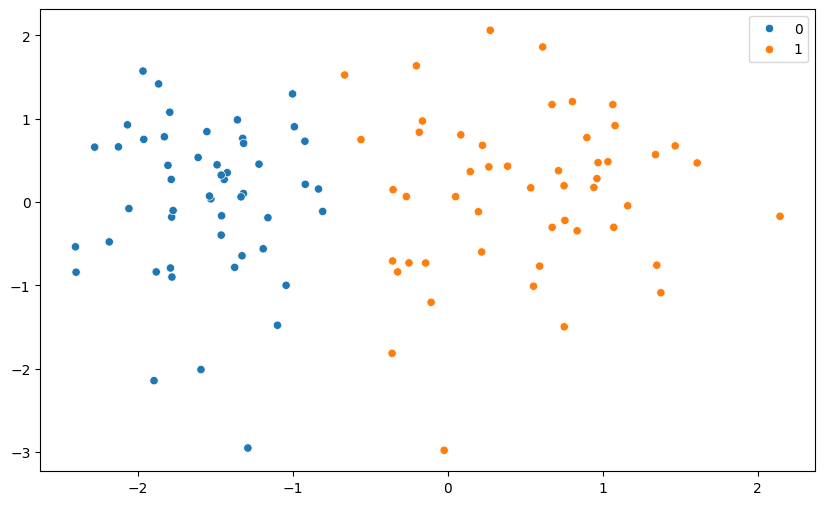

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

Perceptron Trick

In [5]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights =  np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept ,coefficient = perceptron(X,y)

In [8]:
print(intercept)
print(coefficient)

0.9
[1.33247541 0.23260418]


In [9]:
m = -(coefficient[0]/coefficient[1])
b = -(intercept/coefficient[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

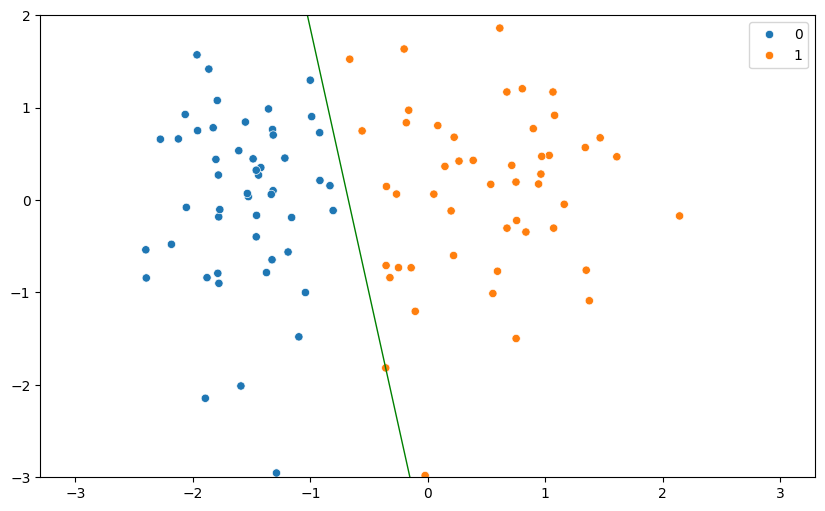

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.ylim(-3,2)

Perceptron Loss Feunction

In [15]:
def loss_fun(X,y):
    w1=w2=b=1
    lr = 0.1

    for i in range(1000):

        for i in range(X.shape[0]):
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i]<0:
                w1 = w1 +lr*y[i]*X[i][0]
                w2 = w2 +lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [16]:
intercept ,coefficient = perceptron(X,y)
print(intercept)
print(coefficient)

0.9
[1.30425354 0.09682909]


In [17]:
m = -(coefficient[0]/coefficient[1])
b = -(intercept/coefficient[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

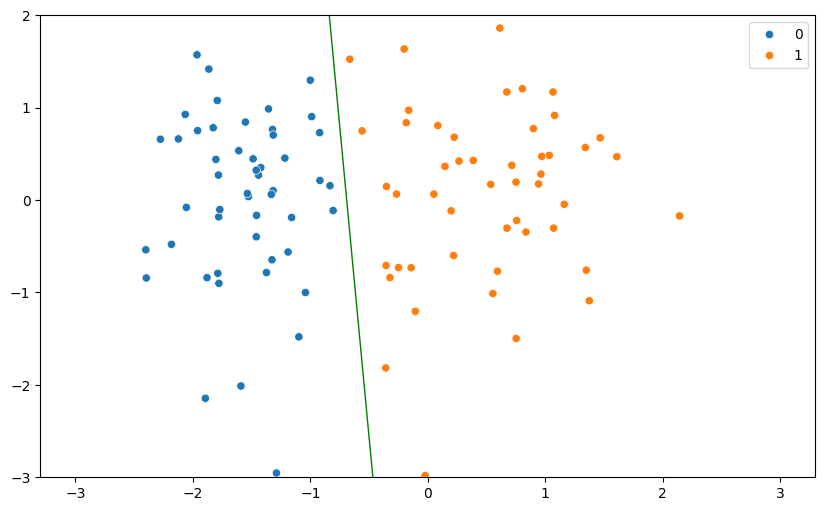

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.ylim(-3,2)